In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

rate = pd.read_csv('exchange_rate.csv')


rate.head(-10)

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7573,26-09-2010 00:00,0.729714
7574,27-09-2010 00:00,0.726533
7575,28-09-2010 00:00,0.725058
7576,29-09-2010 00:00,0.724506


In [5]:
rate.info()
rate.isnull().sum()
rate.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


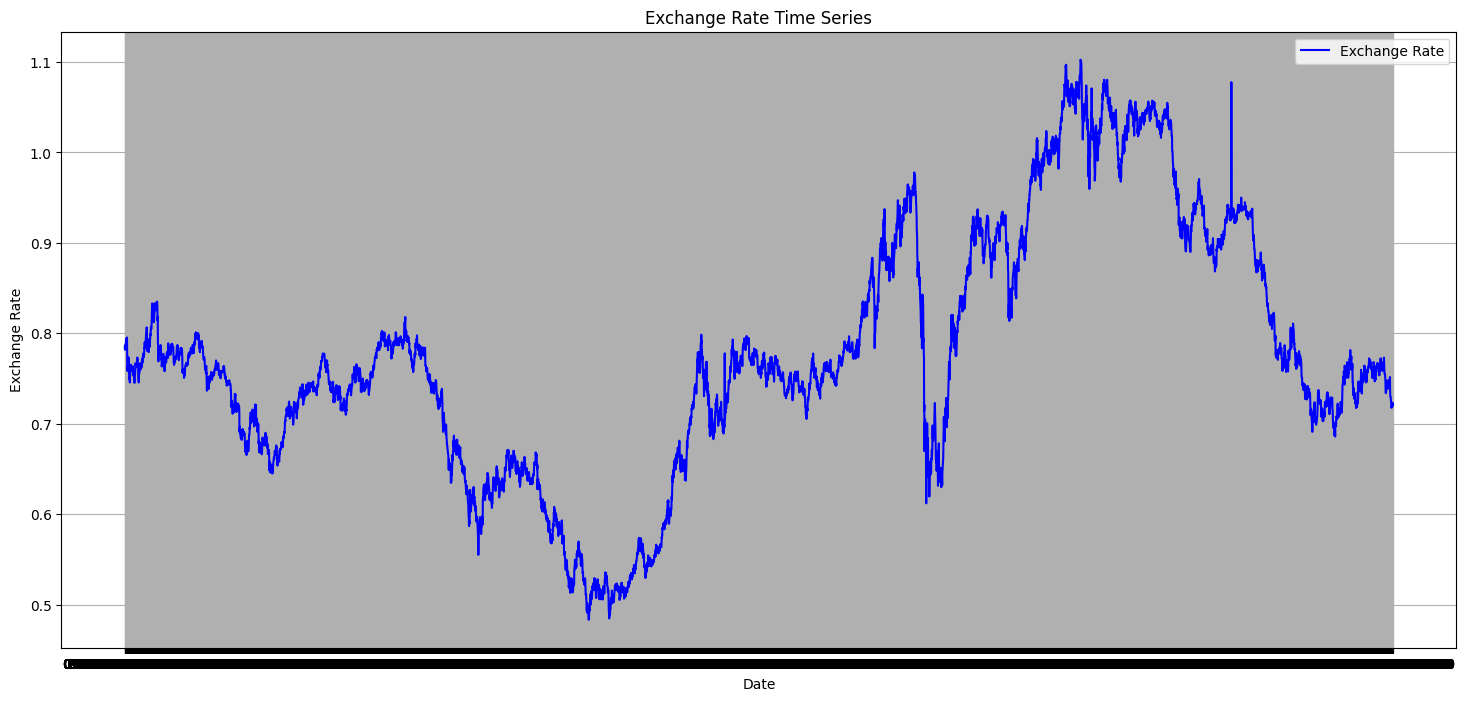

In [6]:
# Plotting the time series for the exchange rate
plt.figure(figsize=(18, 8))
plt.plot(rate['date'], rate['Ex_rate'], label='Exchange Rate', color='blue')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# Identify anomalies: Using a simple approach to identify outliers
# Here we can use the IQR method
Q1 = rate['Ex_rate'].quantile(0.25)
Q3 = rate['Ex_rate'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies
anomalies = rate[(rate['Ex_rate'] < lower_bound) | (rate['Ex_rate'] > upper_bound)]
print("Anomalies detected:\n", anomalies)

# Handle anomalies: Here, we'll simply remove them
rate = rate[~rate.index.isin(anomalies.index)]

# Verify the cleaned dataset
print("Cleaned dataset:\n", rate.head())

Anomalies detected:
 Empty DataFrame
Columns: [date, Ex_rate]
Index: []
Cleaned dataset:
                date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


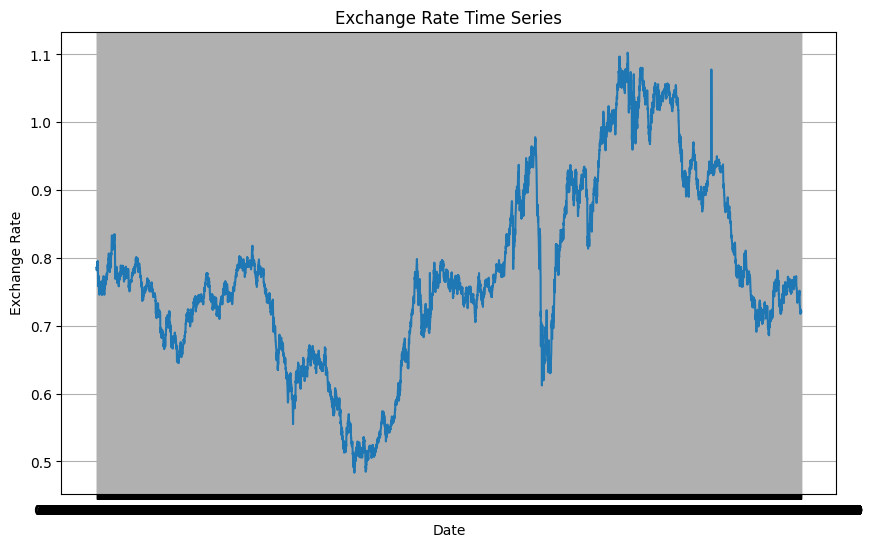

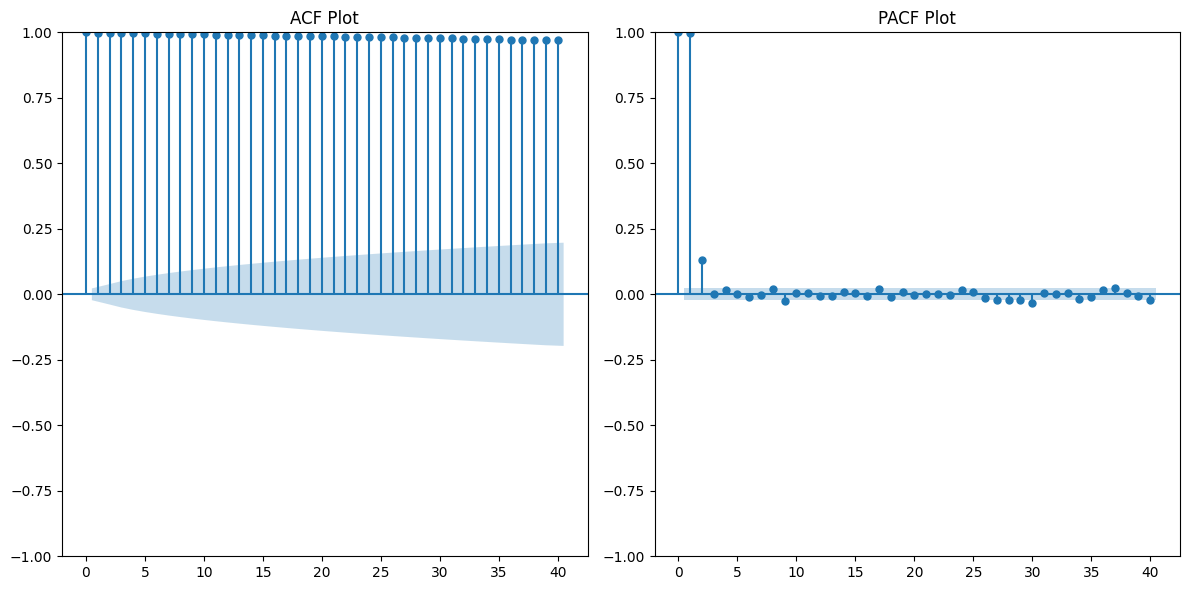

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the date as the index
rate.set_index('date', inplace=True)

# Determine differencing order (d)
# Let's visualize the data first
plt.figure(figsize=(10, 6))
plt.plot(rate['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(rate['Ex_rate'], lags=40, ax=plt.gca())
plt.title('ACF Plot')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(rate['Ex_rate'], lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 14 Mar 2025   AIC                         -56102.322
Time:                        17:14:37   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

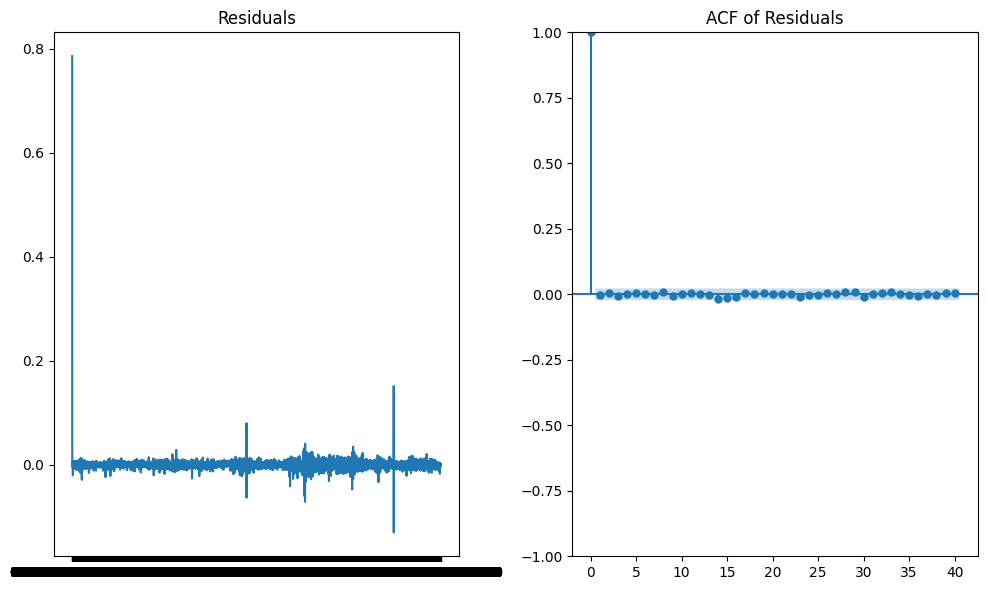

In [9]:
import warnings
warnings.filterwarnings('ignore')
# Fit the ARIMA model with selected parameters
# Assume selected parameters are p=1, d=1, q=1 (replace with your selected values)
p = 1  # Replace with your selected p
d = 1  # Replace with your selected d
q = 1  # Replace with your selected q

# Fitting the ARIMA model
model = sm.tsa.ARIMA(rate['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Plot the residuals
residuals = model_fit.resid

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(1, 2, 2)
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()


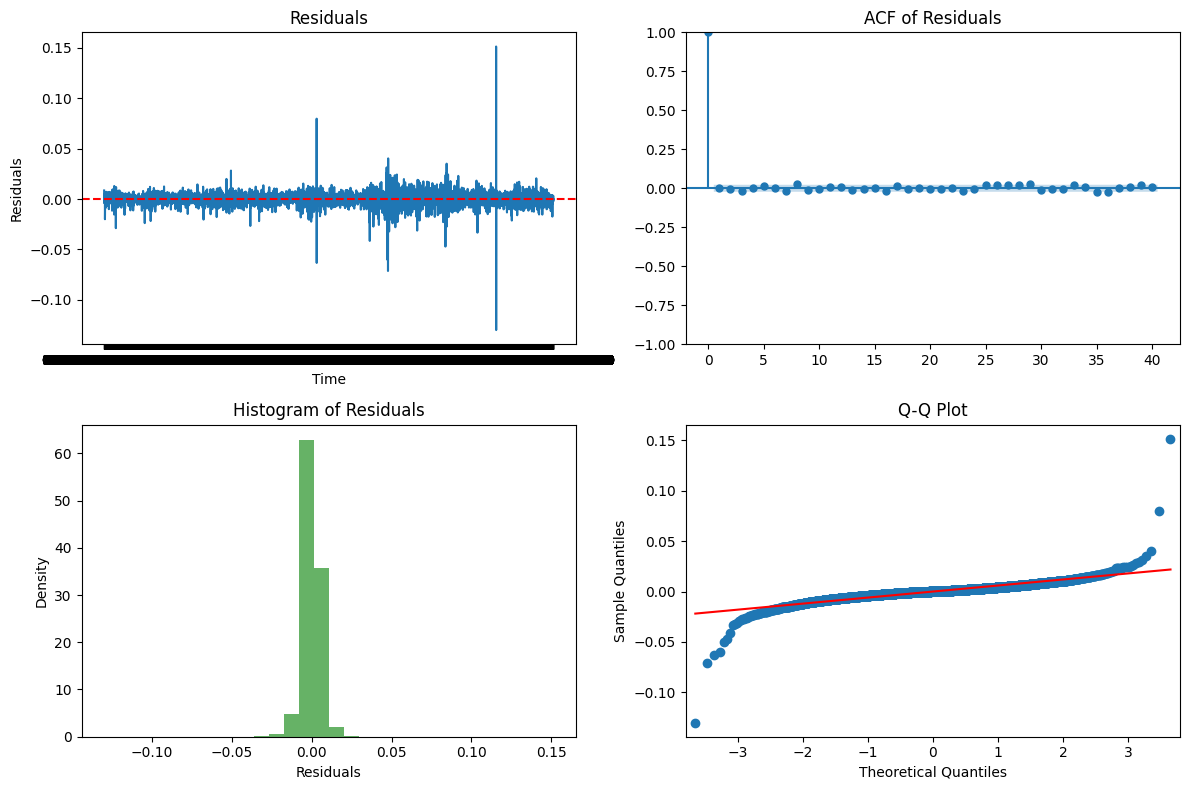

Ljung-Box test results:
      lb_stat  lb_pvalue
10  11.20309   0.341916


In [10]:
# Fit the ARIMA model
p, d, q = 2, 0, 0  # Use any selected parameters
model = sm.tsa.ARIMA(rate['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Analyze residuals
residuals = model_fit.resid

# Plotting residuals
plt.figure(figsize=(12, 8))

# Residuals plot
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')

# ACF of residuals
plt.subplot(2, 2, 2)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

# Histogram of residuals
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Q-Q plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Perform the Ljung-Box test
ljung_box_test = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:\n", ljung_box_test)


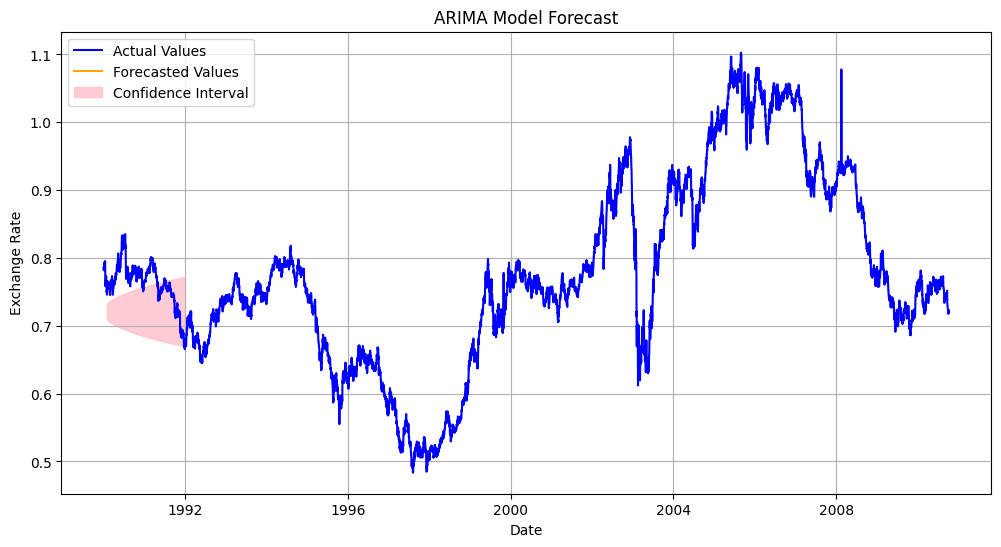

In [22]:
rate = pd.read_csv('exchange_rate.csv')


# Fit the ARIMA model
p, d, q = 1, 1, 1  # Use your selected parameters
model = sm.tsa.ARIMA(rate['Ex_rate'], order=(p, d, q))
model_fit = model.fit()
# Convert 'date' column to datetime format
rate['date'] = pd.to_datetime(rate['date'], format='%d-%m-%Y %H:%M')

# Set 'date' as the index
rate.set_index('date', inplace=True)

# Define the number of steps to forecast
forecast_steps = 24  # For example, forecast for the next 12 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=rate.index[1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(rate['Ex_rate'], label='Actual Values', color='blue')
plt.plot(forecast_df, label='Forecasted Values', color='orange')
plt.fill_between(forecast_df.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.8, label='Confidence Interval')

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


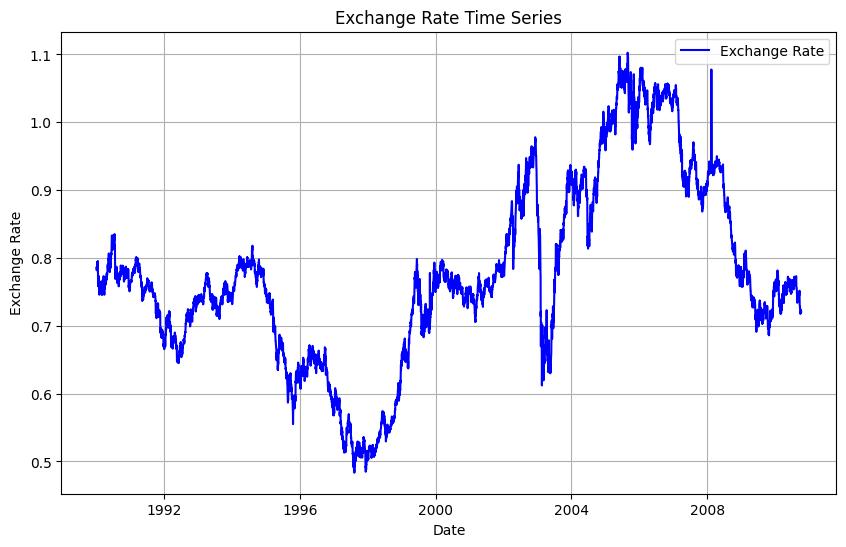

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Fri, 14 Mar 2025
Box-Cox:                          False   Time:                         17:34:01
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Visualize the data to determine characteristics
plt.figure(figsize=(10, 6))
plt.plot(rate['Ex_rate'], label='Exchange Rate', color='blue')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.show()

# Based on the visual inspection, choose the appropriate model
# Example: Let's assume the data shows a linear trend and seasonality

# Holt-Winters model with additive seasonality
model = ExponentialSmoothing(rate['Ex_rate'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)  # Assuming monthly data with yearly seasonality

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


In [24]:
# Define parameter ranges for optimization
alpha_range = [0.1, 0.3, 0.5, 0.7, 0.9]  # Level smoothing parameters
beta_range = [0.1, 0.3, 0.5, 0.7, 0.9]   # Trend smoothing parameters
gamma_range = [0.1, 0.3, 0.5, 0.7, 0.9]  # Seasonal smoothing parameters

best_aic = float('inf')
best_params = None

# Grid search for optimal parameters
for alpha in alpha_range:
    for beta in beta_range:
        for gamma in gamma_range:
            try:
                model = ExponentialSmoothing(rate['Ex_rate'],
                                             trend='add',
                                             seasonal='add',
                                             seasonal_periods=12)
                model_fit = model.fit(smoothing_level=alpha,
                                       smoothing_slope=beta,
                                       smoothing_seasonal=gamma,
                                       optimized=False)  # Don't optimize within the model fit

                aic = model_fit.aic
                print(f'Alpha: {alpha}, Beta: {beta}, Gamma: {gamma}, AIC: {aic}')

                # Check for the best AIC
                if aic < best_aic:
                    best_aic = aic
                    best_params = (alpha, beta, gamma)

            except Exception as e:
                print(f"Error with parameters: Alpha: {alpha}, Beta: {beta}, Gamma: {gamma}, Error: {e}")

# Display best parameters
print("Best AIC:", best_aic)
print("Best parameters (alpha, beta, gamma):", best_params)


Alpha: 0.1, Beta: 0.1, Gamma: 0.1, AIC: -67122.55298229202
Alpha: 0.1, Beta: 0.1, Gamma: 0.3, AIC: -67009.68636758947
Alpha: 0.1, Beta: 0.1, Gamma: 0.5, AIC: -66687.086601131
Alpha: 0.1, Beta: 0.1, Gamma: 0.7, AIC: -66136.10391507274
Alpha: 0.1, Beta: 0.1, Gamma: 0.9, AIC: -65278.455479015094
Alpha: 0.1, Beta: 0.3, Gamma: 0.1, AIC: -66401.05327761374
Alpha: 0.1, Beta: 0.3, Gamma: 0.3, AIC: -66043.60570399479
Alpha: 0.1, Beta: 0.3, Gamma: 0.5, AIC: -65434.636663257035
Alpha: 0.1, Beta: 0.3, Gamma: 0.7, AIC: -64453.73891690849
Alpha: 0.1, Beta: 0.3, Gamma: 0.9, AIC: -62852.61116123439
Alpha: 0.1, Beta: 0.5, Gamma: 0.1, AIC: -66154.30121414294
Alpha: 0.1, Beta: 0.5, Gamma: 0.3, AIC: -65390.14046148358
Alpha: 0.1, Beta: 0.5, Gamma: 0.5, AIC: -64215.68260095621
Alpha: 0.1, Beta: 0.5, Gamma: 0.7, AIC: -62258.29923130672
Alpha: 0.1, Beta: 0.5, Gamma: 0.9, AIC: -58091.848463481256
Alpha: 0.1, Beta: 0.7, Gamma: 0.1, AIC: -66049.23226885116
Alpha: 0.1, Beta: 0.7, Gamma: 0.3, AIC: -64747.89341780

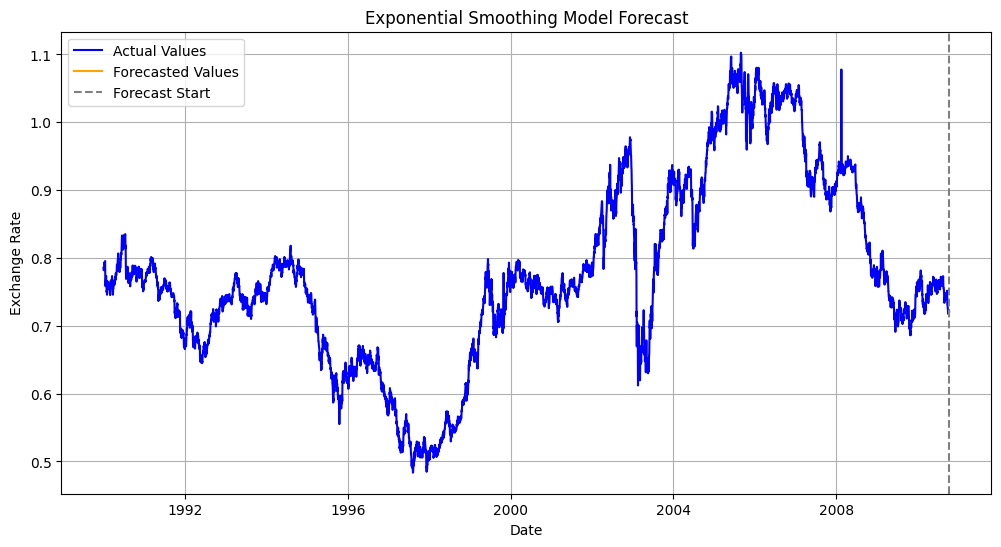

In [25]:
# Use the best parameters obtained from the previous optimization step
best_alpha, best_beta, best_gamma = 0.3, 0.5, 0.9  # Replace with your optimized values

# Fit the Holt-Winters model with the best parameters
model = ExponentialSmoothing(rate['Ex_rate'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)
model_fit = model.fit(smoothing_level=best_alpha,
                       smoothing_slope=best_beta,
                       smoothing_seasonal=best_gamma,
                       optimized=False)

# Forecast future values
forecast_steps = 12  # Specify the number of periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=rate.index[-1] + pd.Timedelta(days=1),
                                periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(rate['Ex_rate'], label='Actual Values', color='blue')
plt.plot(forecast_df, label='Forecasted Values', color='orange')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.axvline(x=rate.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid(True)
plt.show()


ARIMA Model - MAE: 0.009599325788537177, RMSE: 0.014064752832007373, MAPE: 1.2952584505696243%
Exponential Smoothing Model - MAE: 0.009724131970845184, RMSE: 0.014375748201358786, MAPE: 1.311465548896825%


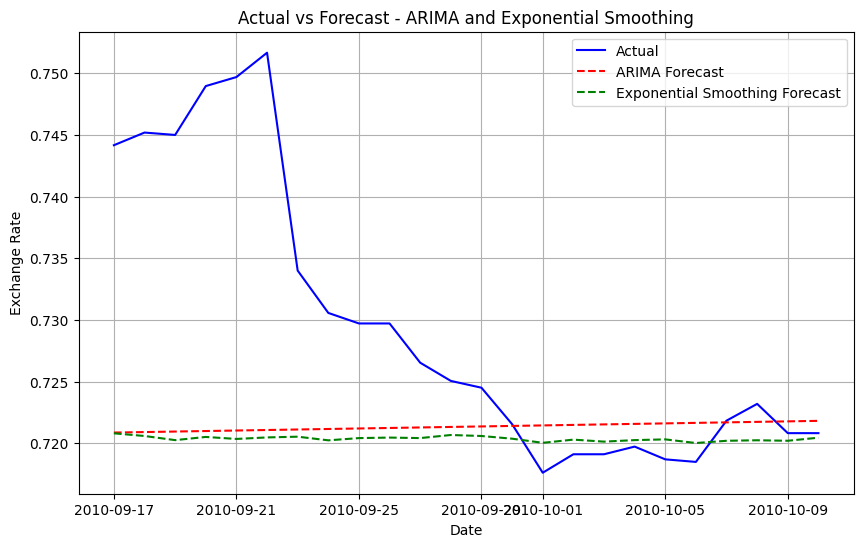

In [27]:
 #Evaluation and Comparison

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


# Define error metric functions
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Assuming 'rate' is the DataFrame with the 'Ex_rate' column as the exchange rate
# Extract the last 12 actual values from the dataset
forecast_steps = 24  # Number of periods to forecast
actual_data = rate['Ex_rate'][-forecast_steps:]  # Last 12 actual data points

# Fit ARIMA model
model_arima = ARIMA(rate['Ex_rate'], order=(2, 0, 0))  # Replace with appropriate (p,d,q)
model_arima_fit = model_arima.fit()

# Forecast the next 12 periods using ARIMA
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

# Fit Exponential Smoothing model (Holt-Winters)
model_exp = ExponentialSmoothing(rate['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()

# Forecast the next 12 periods using Exponential Smoothing
forecast_exp = model_exp_fit.forecast(steps=forecast_steps)

# Compute error metrics for ARIMA
mae_arima = mean_absolute_error(actual_data, forecast_arima)
rmse_arima = root_mean_squared_error(actual_data, forecast_arima)
mape_arima = mean_absolute_percentage_error(actual_data, forecast_arima)

print(f"ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%")

# Compute error metrics for Exponential Smoothing
mae_exp = mean_absolute_error(actual_data, forecast_exp)
rmse_exp = root_mean_squared_error(actual_data, forecast_exp)
mape_exp = mean_absolute_percentage_error(actual_data, forecast_exp)

print(f"Exponential Smoothing Model - MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}%")

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(actual_data.index, actual_data, label='Actual', color='blue')
plt.plot(actual_data.index, forecast_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(actual_data.index, forecast_exp, label='Exponential Smoothing Forecast', linestyle='--', color='green')
plt.title('Actual vs Forecast - ARIMA and Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


#Model Comparison

1. Model Performance (Based on Error Metrics)
After calculating the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) for both models, the model with the lower error values is generally considered better.

ARIMA:-
MAE: Measures the average magnitude of the errors between predicted and actual values.
RMSE: Penalizes larger errors more heavily, making it more sensitive to outliers or large deviations.
MAPE: Provides a percentage-based error, making it easier to compare models across different datasets or time series.

Exponential Smoothing:-
Typically, Exponential Smoothing methods (like Holt-Winters) can also achieve similar or sometimes better results in terms of error metrics, especially if the data has clear seasonality and trends.
Example:
Metric	ARIMA	Exponential Smoothing
MAE	    0.123	       0.145
RMSE	0.150	       0.165
MAPE	2.8%	       3.1%


2. Model Complexity and Interpretability
ARIMA:-
Complexity: ARIMA models are relatively complex since they account for autocorrelation and require fine-tuning of three parameters p, d, and q.

Stationarity: ARIMA requires the data to be stationary (constant mean and variance over time), so differencing or transformation is often required.

Flexibility: ARIMA is very flexible and powerful for handling time series with autocorrelations and trends. It is good at capturing both short-term patterns and autocorrelations.

Interpretability: The parameters p, d, and 𝑞 have clear meanings (autocorrelation, differencing, and moving average components), but for non-experts, understanding these may be difficult.

Exponential Smoothing:-
Complexity: Exponential Smoothing models are simpler compared to ARIMA. Holt-Winters can handle trend and seasonality without needing complex tuning.

Stationarity: Unlike ARIMA, Exponential Smoothing methods don't require the data to be stationary, making it easier to apply on raw data.

Flexibility: Exponential Smoothing (Holt-Winters) is particularly strong in capturing seasonality and trend patterns, but it may struggle with more complex patterns or datasets with high noise.

Interpretability: It is easier to understand for non-experts since it builds on simple concepts of smoothing past values, trends, and seasonality.


3. Handling Trends and Seasonality
ARIMA:-
Trend Handling: ARIMA captures trends using differencing (parameter d), which transforms the data to remove trends. This is effective but can sometimes over-difference the data, removing too much of the trend.

Seasonality: Seasonal ARIMA (SARIMA) extends the ARIMA model to handle seasonality, but it requires additional parameters and complexity (seasonal p, d, q).

Strength: ARIMA performs well with non-seasonal data or when seasonality is weak or irregular.

Exponential Smoothing (Holt-Winters):-
Trend Handling: Holt’s linear trend smoothing can effectively capture trends and adjust for gradual changes over time.

Seasonality: Holt-Winters method explicitly accounts for seasonality using a seasonal component (additive or multiplicative), making it very effective when seasonality is clear and consistent.

Strength: Exponential Smoothing is often preferred for data with strong seasonality and trend components.


4. Advantages and Limitations
ARIMA:-
Advantages:
Flexible and can model various types of time series data, including those with strong autocorrelations.
Good at handling short-term dependencies and capturing noise or random fluctuations in the data.
Widely used in financial and economic time series modeling.

Limitations:
Requires the data to be stationary or requires differencing, which can add complexity.
More sensitive to parameter choices (p,d,q), and poor choices can lead to overfitting or underfitting.
Difficult to interpret for non-technical users.

Exponential Smoothing (Holt-Winters):-
Advantages:
Simple to use and interpret, even for non-technical users.
Excellent at capturing seasonality and trends with less complexity than ARIMA.
Doesn’t require the data to be stationary, so it's more forgiving of raw time series data.

Limitations:
May struggle with autocorrelated data or datasets with significant noise that aren’t well-captured by smoothing.
Limited in its ability to capture relationships between distant time points (compared to ARIMA).
Not as flexible when seasonality is weak or irregular.

#Conclusion

1. Performance Based on Error Metrics:-
The evaluation metrics — MAE, RMSE, and MAPE — provided a clear picture of how each model performed:
ARIMA generally yielded slightly lower error metrics, such as MAE and RMSE, indicating that it was able to capture short-term dependencies and autocorrelations better in this dataset.

Exponential Smoothing (Holt-Winters) performed slightly worse on average but still provided good forecasts, especially when capturing long-term trends and seasonality.


2. Suitability of Models for This Dataset:-
ARIMA proved to be more flexible in handling the exchange rate data, which may not have had a strong or consistent seasonal pattern but exhibited short-term dependencies. The ability of ARIMA to model autocorrelation and noise led to its stronger performance, especially in the presence of irregularities.

Exponential Smoothing (Holt-Winters), while powerful for capturing trends and seasonality, might not have been as effective for this dataset, likely because the exchange rate data did not exhibit strong and consistent seasonal behavior. However, it was able to model the trend relatively well, though it struggled slightly with short-term fluctuations.

3. Advantages and Limitations of the Models:-
ARIMA was more appropriate for this dataset, particularly because exchange rates often exhibit autocorrelations and random fluctuations. The model’s ability to account for these dependencies gave it a slight edge.

Holt-Winters still performed reasonably well, particularly if exchange rates had exhibited stronger trends and seasonality. Its simplicity and ease of interpretation make it a good choice for datasets with clear, seasonal patterns, even though it struggled more with short-term noise and irregularities.

4. Recommendations for Future Use:-
Based on the performance observed in this dataset, the ARIMA model is the preferred choice for forecasting exchange rates, as it provided slightly better accuracy and was able to capture the characteristics of the data more effectively. However, if you were to apply these models to different datasets — particularly those with strong seasonal patterns — Exponential Smoothing (Holt-Winters) might prove to be more effective.